In [200]:
# !pip install mpl_finance
# !pip install python-binance
# !pip install pydeck
# !pip install streamlit
# !pip install ipywidgets
!pip install tabulate

In [201]:
from tabulate import tabulate
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_finance import candlestick_ohlc
import random 
from matplotlib.dates import date2num
import datetime
import binance

In [15]:
a = pd.read_csv('exp.csv', delimiter=';', index_col=[0])
pd.DataFrame(a)

,эксперт 1,эксперт 2,эксперт 3,эксперт 4,эксперт 5,эксперт 6
продукт 1,8,6,6,7,4,8
продукт 2,5,7,5,5,2,7
продукт 3,9,8,9,8,7,4
продукт 4,5,3,4,2,4,6
продукт 5,3,5,5,3,7,3
продукт 6,10,7,9,7,9,6


In [270]:
class expert_evaluations():
    '''
    документация
        '''
    def __init__(self, data):
        self.df = pd.DataFrame(pd.read_csv(data, delimiter=';', index_col=[0]))
        
    def expert(self):
        df = self.df.copy()
        width, length = df.shape[0], df.shape[1]
        square_list = []
        for i, row in df.iterrows():
            square_list.append(row.map(lambda x:x**2))
        square_df = pd.DataFrame(square_list) # датафрейм квадратов

        mean_list = []
        for i, row in df.iterrows():
            mean_list.append(row.mean())
        mean_df = pd.DataFrame(mean_list, index=df.index, columns =['Матожидание']) # столбец матожидания
        print('Математическое ожидание продукта:\n', tabulate(mean_df, headers = 'keys', tablefmt = 'psql'))
        
        variance_list = []
        for i, row in df.iterrows():
            variance_list.append(row.var())
        variance_df = pd.DataFrame(variance_list) # столбец дисперсии "дисп.в"

        sum_squre_list = []
        for i, row in square_df.iterrows():
                sum_squre_list.append(row.mean())
        sum_squre_df = pd.DataFrame(sum_squre_list) # столбец сумм квадратов

        square_sum_list = []
        for i, row in df.iterrows():
                square_sum_list.append((row.sum()/(len(row)))**2)
        square_sum_df = pd.DataFrame(square_sum_list) # столбец сумм квадратов

        square_sum_list = []
        for i, row in df.iterrows():
                square_sum_list.append((row.sum()/(len(row)))**2)
        square_sum_df = pd.DataFrame(square_sum_list) #столбец квадрат суммы

        general_variance_list = []
        for i in range(len(sum_squre_list)):
            general_variance_list.append(sum_squre_list[i]-square_sum_list[i])
        general_variance_df = pd.DataFrame(general_variance_list, index = df.index, columns = ['Дисперсия']) #столбце дисперсий "дисп.г", полученные по формулам
        print('Дисперсия по продукту:\n', tabulate(general_variance_df, headers = 'keys', tablefmt = 'psql'))
        
        standart_deviation_general_list = []
        for i in general_variance_list:
            standart_deviation_general_list.append(i**0.5)
        standart_deviation_general_df = pd.DataFrame(standart_deviation_general_list, index=df.index, columns=['Sigma'])  #столбец стандартного отклонения "x1" 
                                                                            #(от генеральной совокупности найденного по формулам)
        print('Среднеквадратичное отклонение по продукту:\n', tabulate(standart_deviation_general_df, headers = 'keys', tablefmt = 'psql'))

        standart_deviation_sampled_list = []
        for i in variance_list:
            standart_deviation_sampled_list.append(i**0.5)
        standart_deviation_sampled_df = pd.DataFrame(standart_deviation_sampled_list) #столбец стандартного отклонения "x2" 
                                                                            #(от выборки)

        left_margin = [mean_list[i] - standart_deviation_general_list[i] for i in range(len(mean_list))]
        right_margin = [mean_list[i] + standart_deviation_general_list[i] for i in range(len(mean_list))]
        confidence_intervals = [left_margin, right_margin]
        confidence_intervals_df = pd.DataFrame(confidence_intervals, index = ['Левый','Правый'], columns=df.index).T #датафрейм из левого и правого доверительного интервала 
                                                                        #от столбца стандартного отклонения "x1"
        print('Доверительные интервалы :\n', tabulate(confidence_intervals_df, headers = 'keys', tablefmt = 'psql'))

        left_margin_x2 = [mean_list[i] - standart_deviation_sampled_list[i] for i in range(len(mean_list))]
        right_margin_x2 = [mean_list[i] + standart_deviation_sampled_list[i] for i in range(len(mean_list))]
        confidence_intervals_x2 = [left_margin_x2, right_margin_x2]
        confidence_intervals_df_x2 = pd.DataFrame(confidence_intervals_x2).T #датафрейм из левого и правого доверительного интервала 
                                                                        #от столбца стандартного отклонения "x2"
            
        return(confidence_intervals_df)
    def rank(self):
        df = self.df.copy()
        width, length = df.shape[0], df.shape[1]

        mediana_list = []
        for i, row in df.iterrows():
            mediana_list.append(row.median())
        mediana_df = pd.DataFrame(mediana_list, index = df.index, columns=['Медиана']) # столбец медианы
        print('Медиана по продуктам:\n', tabulate(mediana_df, headers = 'keys', tablefmt = 'psql'))

        mean_list = []
        for i, row in df.iterrows():
            mean_list.append(row.mean())
        mean_df = pd.DataFrame(mean_list, index=df.index) # столбец матожидания

        square_list=[]
        for i in range(len(mediana_list)):
            square_list.append(list(df.iloc[i].map(lambda x: (x-mean_list[i])**2)))
        square_df = pd.DataFrame(square_list) # датафрейм из (x - E)^2 

        sum_square_list=[]
        for i in range(len(square_list)):
            sum_square_list.append(square_df.iloc[:,i].sum()) # сумма квадратов разностей x и матожидания

        standart_deviation_list=[]
        for i in range(len(sum_square_list)):
            standart_deviation_list.append(sum_square_list[i]/(len(df.iloc[:,i])-1))
        standart_deviation_df = pd.DataFrame(standart_deviation_list) # список стандартных отклонений

        divide_by_one_list=[]
        for i in standart_deviation_list:
            divide_by_one_list.append(1/i)
        divide_by_one_df = pd.DataFrame(divide_by_one_list) # 1/D в экселе (1 делить на стандартное отклонение)

        sum_divided_std = sum(divide_by_one_list) # сумма разделенных на 1 чисел
        ratios_for_percentage = [(i/sum_divided_std)*100 for i in divide_by_one_list] 
        
        expert_competence_ratios = [i/sum_divided_std for i in divide_by_one_list] #КОЭФФИЦИЕНТЫ КОМПИТЕНТНОСТИ ЭКСПЕРТОВ
        ratios = ["{:.2%}".format(i) for i in expert_competence_ratios]
        expert_competence_ratios_df = pd.DataFrame(ratios, index= df.columns, columns =['Коэффициенты']).T
        print('Коэффициенты компетентности экспертов:\n', tabulate(expert_competence_ratios_df, headers = 'keys', tablefmt = 'psql'))

        df_list=[]
        for i in range(len(expert_competence_ratios)):
            df_list.append(df.iloc[:,i].tolist()) #неважная часть, облистывание главного датасета

        multiply_weighted_average_ranks_list=[]
        for i in range(len(df_list)):
            inner_list=[]
            for e in df_list[i]:
                inner_list.append(expert_competence_ratios[i]*e)
            multiply_weighted_average_ranks_list.append(inner_list)
        multiply_weighted_average_ranks_df = pd.DataFrame(multiply_weighted_average_ranks_list) #произведения коэффициентов на датасет

        weighted_average_ranks = []
        for i in range(len(expert_competence_ratios)):
            weighted_average_ranks.append(multiply_weighted_average_ranks_df.iloc[:,i].sum())
        weighted_average_ranks_df = pd.DataFrame(weighted_average_ranks, index = df.index, columns=['Ранги'])#средневзвешанные ранги
        print('Cредневзвешенные ранги по продуктам:\n', tabulate(weighted_average_ranks_df, headers = 'keys', tablefmt = 'psql'))

        return('Обработка завершена!') 

In [ ]:
def run():
    calculating = int(input('''Введите каким решением хотите воспользоваться:
          1) Математическая обработочка экспертных оценочек
          2) Математическая обработочка ранговых оценочек
              '''))
    file = input('''Введите название CSV-файла в формате "name.csv", дорогой пользователь:\n\n''')
    e = expert_evaluations(file)
    
    if calculating == 1:
        e.expert()
    elif calculating == 2:
        e.rank()
    continue_ = input('Хотите ли вы продолжить дорожайший пользователь?\n(Да или нет)\n')
    continue_ = continue_.lower()
    index = continue_.find('да')
    if index != -1:
        run()

In [309]:
run() #ДЛЯ РАБОТЫ ЗАПУСТИТЬ ЭТУ ЧАСТЬ КОДА

Введите каким решением хотите воспользоваться:
          1) Математическая обработочка экспертных оценочек
          2) Математическая обработочка ранговых оценочек
              1
Введите название CSV-файла в формате "name.csv", дорогой пользователь:

exp.csv
Математическое ожидание продукта:
 +-----------+---------------+
|           |   Матожидание |
|-----------+---------------|
| продукт 1 |       6.5     |
| продукт 2 |       5.16667 |
| продукт 3 |       7.5     |
| продукт 4 |       4       |
| продукт 5 |       4.33333 |
| продукт 6 |       8       |
+-----------+---------------+
Дисперсия по продукту:
 +-----------+-------------+
|           |   Дисперсия |
|-----------+-------------|
| продукт 1 |     1.91667 |
| продукт 2 |     2.80556 |
| продукт 3 |     2.91667 |
| продукт 4 |     1.66667 |
| продукт 5 |     2.22222 |
| продукт 6 |     2       |
+-----------+-------------+
Среднеквадратичное отклонение по продукту:
 +-----------+---------+
|           |   Sigma |
|-------

[2010, 2470, 2386, 2288]
[2010, 2288, 2386, 2470]
18262.0
(18262.0, 2386, 2470, 2010, 2288)
[2430, 2062, 2344, 2021]
[2021, 2062, 2344, 2430]
18262.0
(18263.0, 2062, 2430, 2021, 2344)
[2042, 2164, 2060, 2455]
[2042, 2060, 2164, 2455]
18262.0
(18264.0, 2060, 2455, 2042, 2164)
[2196, 2467, 2477, 2011]
[2011, 2196, 2467, 2477]
18262.0
(18265.0, 2467, 2477, 2011, 2196)
[2246, 2408, 2082, 2175]
[2082, 2175, 2246, 2408]
18262.0
(18266.0, 2175, 2408, 2082, 2246)
[2299, 2361, 2300, 2364]
[2299, 2300, 2361, 2364]
18262.0
(18267.0, 2300, 2364, 2299, 2361)
[(18262.0, 2386, 2470, 2010, 2288), (18263.0, 2062, 2430, 2021, 2344), (18264.0, 2060, 2455, 2042, 2164), (18265.0, 2467, 2477, 2011, 2196), (18266.0, 2175, 2408, 2082, 2246), (18267.0, 2300, 2364, 2299, 2361)]


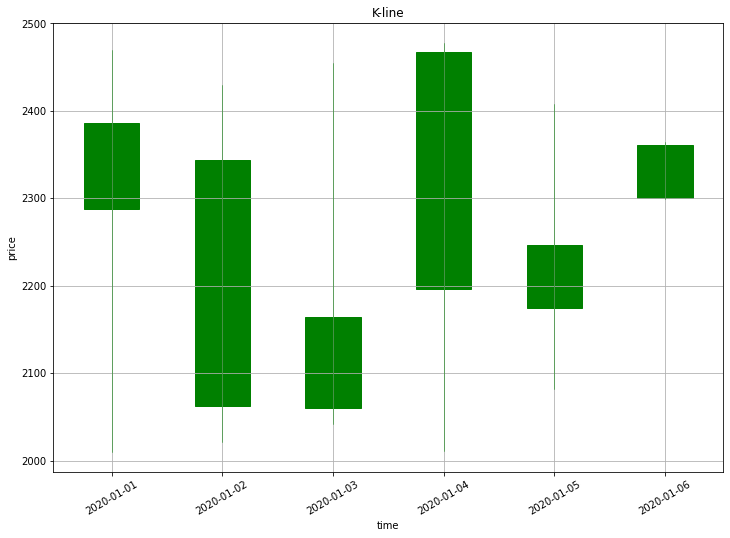

In [181]:
start="2020-1-1"
data=[]
for i in range(6):    
    random_data=[1.419448, 3.913886, ]
    print(random_data)
    sorted_data=sorted(random_data)
    print(sorted_data)
    day=date2num(datetime.datetime.strptime(start,'%Y-%m-%d'))
    print(day)
    if i==0:
        one=(day,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2]) if random.random()>0.5 else (day,sorted_data[2],sorted_data[3],sorted_data[0],sorted_data[1])       
        print(one)
    else:
        one=(day+i,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2]) if random.random()>0.5 else (day+i,sorted_data[2],sorted_data[3],sorted_data[0],sorted_data[1])
        print(one)
    data.append(one)
print(data)
fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
fig.subplots_adjust(bottom=0.1)
ax.xaxis_date()
plt.xticks(rotation=30)
plt.title('K-line')
plt.xlabel('time')
plt.ylabel('price')
candlestick_ohlc(ax,data,width=0.5,colorup='green',colordown='green') 
plt.grid(True)


In [183]:
help(widgets)

Help on package ipywidgets:

NAME
    ipywidgets - Interactive widgets for the Jupyter notebook.

DESCRIPTION
    Provide simple interactive controls in the notebook.
    Each Widget corresponds to an object in Python and Javascript,
    with controls on the page.
    
    To put a Widget on the page, you can display it with IPython's display machinery::
    
        from ipywidgets import IntSlider
        from IPython.display import display
        slider = IntSlider(min=1, max=10)
        display(slider)
    
    Moving the slider will change the value. Most Widgets have a current value,
    accessible as a `value` attribute.

PACKAGE CONTENTS
    _version
    embed
    tests (package)
    widgets (package)

SUBMODULES
    docutils
    domwidget
    interaction
    trait_types
    util
    valuewidget
    widget
    widget_bool
    widget_box
    widget_button
    widget_color
    widget_controller
    widget_core
    widget_date
    widget_description
    widget_float
    widget_in